In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
dataset=pd.read_csv(r"C:\Users\Aditya Kumar\Documents\heart.csv")
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [68]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [69]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()

In [70]:
le_dataset=dataset
le_dataset.Sex = le.fit_transform(le_dataset.Sex)
#le_dataset.Sex

male is 1, female is 0


In [71]:
dataset.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [72]:
le_dataset=dataset
le_dataset.ChestPainType = le.fit_transform(le_dataset.ChestPainType)

ata is 1, nap is 2, asy is 0, ta is 3

In [73]:
dataset.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [74]:
le_dataset=dataset
le_dataset.RestingECG = le.fit_transform(le_dataset.RestingECG)

normal is 1, st is 2, lvh is 0

In [75]:
dataset.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [76]:
le_dataset=dataset
le_dataset.ExerciseAngina = le.fit_transform(le_dataset.ExerciseAngina)

n is 0, y is 1

In [77]:
dataset.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [78]:
le_dataset=dataset
le_dataset.ST_Slope = le.fit_transform(le_dataset.ST_Slope)

up is 2, flat is 1,down is 0

In [79]:
le_dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [80]:
X = le_dataset.drop('HeartDisease',axis='columns')
Y = le_dataset['HeartDisease']

In [81]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=1)

In [82]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [83]:
model.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
model.score(xtest,ytest)

0.8913043478260869

<function matplotlib.pyplot.show(close=None, block=None)>

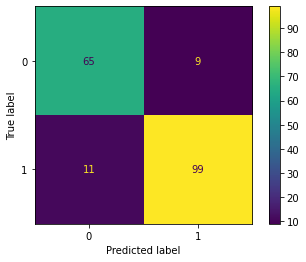

In [85]:
y_pred=model.predict(xtest)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,xtest,ytest)
plt.show

In [88]:
model.predict([[le_dataset.Age(20)]])

TypeError: 'Series' object is not callable